#  Equipment Losses: Data Analysis

- Data info:
    - it has tow data file-
    - One for Machinary Equiment - have 10 columns and 34 rows
    - Othe for personal losses- have 5 columns and 34 rows
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('../input/2022-ukraine-russian-war/russia_losses_equipment.csv',parse_dates=['date'])

In [3]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [4]:
df.shape

(34, 15)

In [5]:
# df['month']=df['date'].dt.month_name()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   34 non-null     datetime64[ns]
 1   day                    34 non-null     int64         
 2   aircraft               34 non-null     int64         
 3   helicopter             34 non-null     int64         
 4   tank                   34 non-null     int64         
 5   APC                    34 non-null     int64         
 6   field artillery        34 non-null     int64         
 7   MRL                    34 non-null     int64         
 8   military auto          34 non-null     int64         
 9   fuel tank              34 non-null     int64         
 10  drone                  34 non-null     int64         
 11  naval ship             34 non-null     int64         
 12  anti-aircraft warfare  34 non-null     int64         
 13  special

In [7]:
df.isnull().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

In [8]:
df.fillna(0,inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,18.500000,71.470588,84.411765,379.705882,1238.000000,171.735294,60.588235,682.058824,63.264706,20.529412,3.411765,31.764706,6.882353,0.529412
std,9.958246,35.719645,39.626374,150.780300,342.728446,85.610219,26.174378,338.199954,5.577600,23.649249,1.653603,17.388709,8.347617,1.331103
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,10.250000,40.250000,42.000000,273.000000,955.000000,106.000000,50.000000,418.500000,60.000000,3.250000,2.000000,19.500000,0.000000,0.000000
50%,18.500000,75.500000,88.000000,381.500000,1237.500000,145.000000,63.000000,608.500000,60.000000,7.500000,3.000000,34.000000,0.000000,0.000000
75%,26.750000,98.500000,122.500000,506.250000,1550.750000,249.000000,80.000000,992.250000,67.500000,32.250000,3.000000,45.000000,14.500000,0.000000
max,35.000000,131.000000,131.000000,605.000000,1723.000000,305.000000,96.000000,1184.000000,75.000000,81.000000,7.000000,54.000000,21.000000,4.000000


In [11]:
df.corr()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
day,1.000000,0.992055,0.969582,0.995848,0.991946,0.985003,0.957858,0.990957,0.774446,0.870984,0.833624,0.978420,0.906966,0.605811
aircraft,0.992055,1.000000,0.960263,0.986275,0.986025,0.979639,0.930236,0.984153,0.768378,0.868133,0.829277,0.962133,0.916679,0.608991
helicopter,0.969582,0.960263,1.000000,0.975068,0.977572,0.935898,0.940525,0.959639,0.642105,0.751731,0.728940,0.984678,0.828115,0.454193
tank,0.995848,0.986275,0.975068,1.000000,0.995383,0.976978,0.971158,0.989301,0.745859,0.842823,0.811398,0.985932,0.886319,0.573027
APC,0.991946,0.986025,0.977572,0.995383,1.000000,0.975592,0.963980,0.992514,0.723413,0.824619,0.780438,0.983200,0.888532,0.542019
field artillery,0.985003,0.979639,0.935898,0.976978,0.975592,1.000000,0.931059,0.990988,0.828202,0.905996,0.839040,0.944741,0.956443,0.614475
MRL,0.957858,0.930236,0.940525,0.971158,0.963980,0.931059,1.000000,0.957186,0.675368,0.774186,0.762276,0.976772,0.803761,0.531780
military auto,0.990957,0.984153,0.959639,0.989301,0.992514,0.990988,0.957186,1.000000,0.762007,0.857699,0.805907,0.971186,0.927685,0.579496
fuel tank,0.774446,0.768378,0.642105,0.745859,0.723413,0.828202,0.675368,0.762007,1.000000,0.960104,0.881492,0.655855,0.862405,0.747887
drone,0.870984,0.868133,0.751731,0.842823,0.824619,0.905996,0.774186,0.857699,0.960104,1.000000,0.933418,0.766381,0.925004,0.807132


In [12]:
col = [ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']

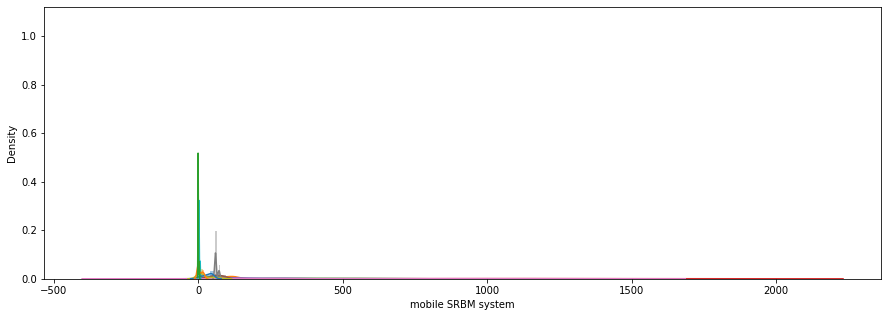

In [13]:

plt.figure(figsize=(15,5))
for i in col:
    sns.distplot(df[i])

In [14]:
import plotly.figure_factory as ff
hist_data = []
group_labels = []

for i in col:
    hist_data.append(df[i])
    group_labels.append(i)

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[.1, .25, .5, 1,.1, .25, .5, 1,.1, .25, .5, 1,.1, .25, .5, 1,1])
fig.show()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [15]:
df.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'],
      dtype='object')

In [16]:
col = [ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']

In [17]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
for i in col:
    fig.add_trace(go.Scatter(x=df['date'], y=df[i], mode='lines+markers',name=i,))

fig.show()

In [18]:
fig = go.Figure()
for i in col:
    fig.add_trace(go.Scatter(x=df['day'], y=df[i], mode='lines',name=i,))

fig.show()

In [19]:
df.sort_values(by='aircraft',ascending=False).head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
33,2022-03-30,35,131,131,605,1723,305,96,1184,75,81,7,54,21.0,4.0
32,2022-03-29,34,127,129,597,1710,303,96,1178,73,71,7,54,21.0,4.0
31,2022-03-28,33,123,127,586,1694,302,95,1150,73,66,7,54,21.0,4.0
30,2022-03-27,32,121,127,582,1664,294,93,1144,73,56,7,52,21.0,4.0
29,2022-03-26,31,117,127,575,1640,293,91,1131,73,56,7,51,19.0,2.0
28,2022-03-25,30,115,125,561,1625,291,90,1089,72,53,5,49,18.0,0.0
27,2022-03-24,29,108,124,530,1597,280,82,1033,72,50,4,47,16.0,0.0
26,2022-03-23,28,101,124,517,1578,267,80,1008,70,42,4,47,15.0,0.0
25,2022-03-22,27,99,123,509,1556,252,80,1000,70,35,3,45,15.0,0.0
24,2022-03-21,26,97,121,498,1535,240,80,969,60,24,3,45,13.0,0.0


In [20]:
df.sum().sort_values().sum()

96317.0

Text(0.5, 1.0, 'Destroyed Equepments')

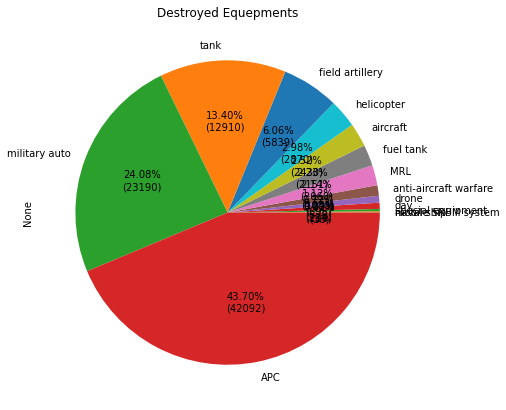

In [21]:
plt.figure(figsize=(7,7))
df.sum().sort_values().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df.sum().sort_values().sum())))
plt.title('Destroyed Equepments')

# Self Function to create intrective bar and count plot
- using this function we can add value of the bar as well as percentage of total.
- default it will plot barplot, also we can use count plot using this, just edit the 'barplot' to 'countplot' 
- also position can be adjusted using x_pos and y_pos parameters,
- also title can we added easy, just pass the title='your title, default it is none
- explore it for more... or customise as you can.

In [22]:
def num2MB(num):
    '''
        num: int, float
        it will return values like thousands(10K), Millions(10M),Billions(1B)
        '''
    if num < 1000: return int(num)
    if num >= 1000 and num < 1000000:return f'{float("%.1f" %(num/1000))}K'
    elif num>= 1000000 and num < 1000000000: return f'{float("%.1f" %(num/1000000))}M'
    else: return f'{float("%.1f" %(num/1000000000))}B'
    
def myBarPlot(data,data2=None,title=None,x_pos=0.25,y_pos=10,val_per=None):
    '''
    data: data
    data2: hue data
    title: str- title of graph
    x_pos: int/float - to adjust x-axis position of text
    y_pos=10: int/float - to adjust y-axis position of text
    val_per: default: None- nothing print
            'value': to print actual value on top
            'percent': to print in percent
            'val_per': to print both value and percent
    
    '''
    
    total_data = data.shape[0] # total no of rows in data
    
    ax = sns.barplot(data,data2)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)      
        a = height
        x = i.get_x() # get x_axis value
        b = 0
        if val_per == 'value':
            b = num2MB(a)
        elif val_per == "percent":
            b = '{:.2f}%'.format((a/total_data)*100)
        elif val_per == 'val_per':
            b = '{}\n{:.2f}%'.format(num2MB(a),(a/total_data)*100)
        else:
            b = ''
 
        ax.text(x=x+x_pos,y=height+y_pos,s=b,rotation=None) # shift+tab for more parameter
    plt.title(title,fontdict={'fontsize':20,'color':'red'})
    plt.xticks(rotation=90)

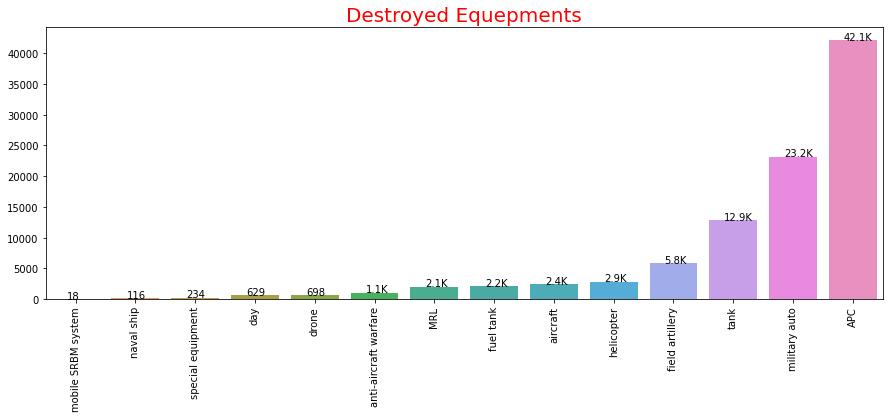

In [23]:
plt.figure(figsize=(15,5))
myBarPlot(df.sum().sort_values().index,df.sum().sort_values().values,val_per='value', title='Destroyed Equepments')

#  Personal Loss: Data Analysis

In [24]:
df2 = pd.read_csv('../input/2022-ukraine-russian-war/russia_losses_personnel.csv',parse_dates=['date'])

In [25]:
df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [26]:
df2.shape

(34, 5)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        34 non-null     datetime64[ns]
 1   day         34 non-null     int64         
 2   personnel   34 non-null     int64         
 3   personnel*  34 non-null     object        
 4   POW         34 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.5+ KB


In [28]:
df2.isnull().sum()

date          0
day           0
personnel     0
personnel*    0
POW           0
dtype: int64

In [29]:
df2.duplicated().sum()

0

<AxesSubplot:xlabel='personnel', ylabel='Density'>

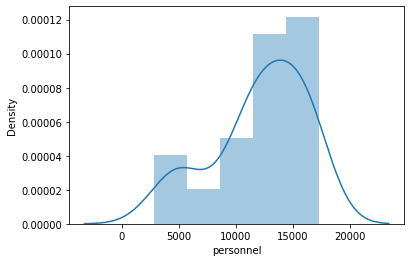

In [30]:
sns.distplot(df2['personnel'])

In [31]:
df2['personnel*'].value_counts()

about    28
more      6
Name: personnel*, dtype: int64

In [32]:
df2['POW'].value_counts()

389    6
405    5
0      4
200    4
412    4
421    2
430    2
216    1
232    1
259    1
284    1
360    1
371    1
411    1
Name: POW, dtype: int64

# Personal Losses

In [33]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df2['date'], y=df2['personnel'], mode='lines+markers',name=i,))

fig.show()

In [34]:
import plotly.express as px
fig = px.line(df2, x='date', y='personnel', color='personnel*', symbol="personnel*")
fig = px.line(df2, x='date', y='POW', color='POW', symbol="POW")

fig.show()

In [35]:
fig = px.line(df2, x='date', y='POW', color='POW', symbol="POW")

fig.show()

In [36]:
df2.sort_values(by='personnel',ascending=False).head(10)

,date,day,personnel,personnel*,POW
33,2022-03-30,35,17300,about,430
32,2022-03-29,34,17200,about,430
31,2022-03-28,33,17000,about,421
30,2022-03-27,32,16600,about,421
29,2022-03-26,31,16400,about,412
28,2022-03-25,30,16100,about,412
27,2022-03-24,29,15800,about,412
26,2022-03-23,28,15600,about,412
25,2022-03-22,27,15300,about,411
24,2022-03-21,26,15000,about,405


In [37]:
df2.sort_values(by='personnel').head(10)

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200
5,2022-03-02,7,5840,about,200
6,2022-03-03,8,9000,about,200
7,2022-03-04,9,9166,about,200
8,2022-03-05,10,10000,about,216
9,2022-03-06,11,11000,about,232


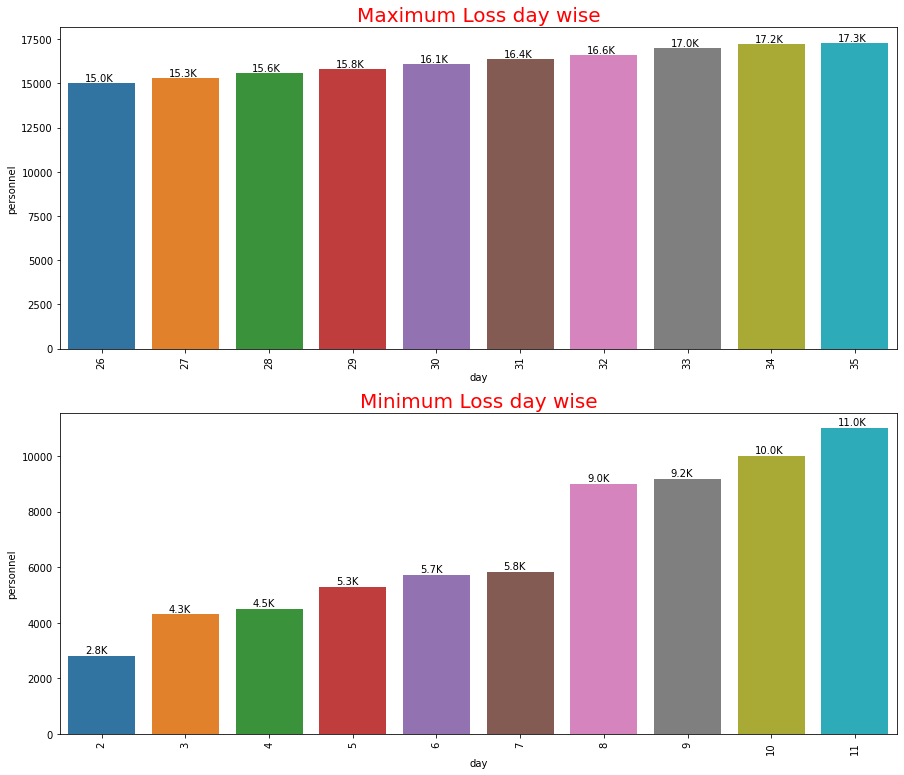

In [38]:
plt.figure(figsize=(15,13))
plt.subplot(211)
myBarPlot(df2.sort_values(by='personnel',ascending=False).head(10)['day'],df2.sort_values(by='personnel',ascending=False).head(10)['personnel'],val_per='value',x_pos=0.2,y_pos=100,title='Maximum Loss day wise')


plt.subplot(212)
myBarPlot(df2.sort_values(by='personnel').head(10)['day'],df2.sort_values(by='personnel').head(10)['personnel'],val_per='value',x_pos=0.2,y_pos=100,title='Minimum Loss day wise')


In [39]:
df2.sort_values(by='personnel',ascending=False).head(10)

,date,day,personnel,personnel*,POW
33,2022-03-30,35,17300,about,430
32,2022-03-29,34,17200,about,430
31,2022-03-28,33,17000,about,421
30,2022-03-27,32,16600,about,421
29,2022-03-26,31,16400,about,412
28,2022-03-25,30,16100,about,412
27,2022-03-24,29,15800,about,412
26,2022-03-23,28,15600,about,412
25,2022-03-22,27,15300,about,411
24,2022-03-21,26,15000,about,405


# Conclusion: 
- we can clearly see there is linear short of relation between day and euipments as well as day personal losses.
- After 35 day there there is only high peak on losses wheather is personal or finencail.